<center> 
    <h1> 
        Data Camp Project

 <center>
    <h1> 
        Prediction of the engagement rate on Instagram

<div style="text-align: center">
<img src="https://github.com/BadrAlpha07/Data-Camp-Project/blob/main/Image/instagram_logo.png?raw=true" width="200px">
</div>

<div style="text-align: center">
    <em>
        Authors : Taoufik Aghris - Bastien Billiot - Simon Demouchy - Aymane Berradi - Badr Laajaj
    </em>
</div>

# Table of content
1. [Introduction](#Introduction)
    - [The development of social media as daily habits through multiple platforms](#See_later)
    - [The growing influence of Instagram](#See_later)
    - [Influencers and the interest of brands on Instagram](#See_later)
    - [The growing influence of Instagram](#See_later)
2. [Problem presentation](#Data_presentation)
    - [Influence Marketing Strategy and Influenceurs identification](#See_later)
    - [Target definition : Engagement Rate per Post (ERP)](#See_later)
    - [Strategic impact and motivation](#See_later)
    - [Performance monitoring](#See_later)
    - [Problem definition : Predict the engagement rate on Instagram](#See_later)
3. [Data exploration](#Data_exploration)
    - [Dataset presentation](#Data_Processing)
    - [Data Processing](#Data_Processing)
    - [Top 50 : What are the kind of people in it ?](#See_later)
    - [Impact of the day of the week ?](#See_later)
    - [Analysis of the target](#See_later)
4. [Workflow](#Workflow)
5. [Submission](#Submission)

# Import

In [1]:
import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import gensim
%matplotlib inline
import seaborn as sns
sns.set()
import re
import os
import numpy as np
np.random.seed(2021)

# 1. Introduction

## The development of social media as daily habits through multiple platforms

Since 2004 and the creation of Facebook, social media have shifted human interaction and communication towards digital means of messaging, reaching and sharing with one another. Since then, technological developments have enabled to connect easily through mobile phones for instance but also to increase connectivity such as 3G and 4G. These improvements have multiplied the number of digital users. Facebook has therefore benefited from this digitalisation and has led the way to a massive use of social media to communicate through various platforms such as Faceebook Messenger. Indeed, on the 24th August 2015, 2 billion of users connectedd to Facebook on the same day. 

With this massive success, alongside the increased digitalisation of products, services and entertainments, mostly through the democratisation of mobile applications, users' daily habits have incorporated the use of social media as one of the most useful and used mean to communicate, be informed or share personnal points of view. Therefore, new social media have emerged to cope with and to leverage users' diversified and massive use of communication platforms enabled by this digitalisation. Thus, many social media apps have skyrocketed with precise target usage - share and be informed on Twitter (2006), professionnal usage on LinkedIn (2002), discussion on Reddit (2005), inspirational topic sharing and discoverring on Pinterest (2008) etc.

<div style="text-align: center">
<img src="https://github.com/BadrAlpha07/Data-Camp-Project/blob/main/Image/social_media.jpg?raw=true" width="300px">
</div>

According to a study from Hootsuite, there are 3.96 billion active users of social networks, representing 51% of the world's population. Time spent on social networks in 2020 is 2h22 on a global average (1h36 in France).

Among the most popular social media, Instagram has become increasingly used by being based on videos and photos sharing,  reaching a billion monthly active users in 2018. It has therefore attracted a wide, relatively young and digital native audience compared to Facebook's in 2012 (when Facebook bought it for 1 billion dollars).  

## The growing influence of Instagram

Instagram has experienced a steady growth since its creation in 2010 by the American Kevin Systrom and the Brazilian Mike Krieger. Instagram has been made popular thanks to the "stories" in images published by stars and the social network has become a global social phenomenon. "Thanks to filters that improve the rather mediocre quality of photos taken on mobile phones, Instagram has become a place dedicated to retouched images of people's lives" as Sarah Frier, a Bloomberg journalist, wrote. 

Instagram has therefore created a platform where many users share their photos and videos. The platform has thus enabled many people to gain influence and be followed in return by thousands or even millions of fans. Indeed, some people leverage the number of users and the digital communication channel offered by Instagram though an intensive exposure, posting and sharing to target and reach an ever-increasing audience. It is the digital influence that is now taking over among the many communication levers. These people, known as influencers become a relay of opinion with users.

## Influencers and the interest of brands on Instagram

Even if someone is a user of Instagram, he remains a consumer of products and services. An influencer, through his adress to a large audience benefits from a direct communication channel towards these customers. As a digital opinion gatherer, he is able to affect buying behaviour through the platform. His work allows him to influence the consumer around the products or services he will promote. The targets are then multiple, since the influencers work through various and varied themes.This stature gives them the power to prescribe new trends.  

Brands have therefore identified, among other social media, Instagram as a new digital sales and promotion channel for their products or services, giving the large number of users (customers). One of the ways to leverage this digital channel is to benefit from the influencer as an intrmediary. Indeed, a brand can also leverage Instagram through its own account but the influencer benefits from a closer and more personnal relationship to a large audience. This is why influencers have been increasingly demanded by brands. Brands thus consider influencers as indispensable levers, introducing them into their communication strategies to increase their notoriety and visibility as well as developing their digital sales and promotion channels. This has been known as the influence marketing industry. Therefore, created as a photo sharing site, "Instagram has become the digital showcase for brands that want to surprise a public tired of classic marketing" as [Les Echos](https://www.lesechos.fr/2018/02/instagram-la-plus-grande-vitrine-du-monde-1019800) titled in 2018. Indeed, Instagram remains the preferred platform for influence marketing strategies. [According to estimates](https://influencermarketinghub.com/Influencer_Marketing_Benchmark_Report_2020.pdf) the platform accounts for around two thirds of partnership requests from French influencers last year. Next come blogs (18.5% of requests), Youtube (7.7%) and Facebook (3.9%). A poll from Hivency, an influence marketing adgency showed that 71.7\% of French influencers consider Instagram to be the most engaging network and 78\% of influence marketing professionals focus their efforts on Instagram posts that they consider more effective.  

However, in order to target, adress, reach or convert efficiently the audience and potential buyers, a brand has to choose cleverly how it shows up in Instagram. And it's why machine learning appeared as potentially relevant. Indeed, by collecting data on Instagram, a brand can find what kind of posts creates a lot of reactions. 

Before going deeper in the analysis, it is important to clearly define a metric to quantify the term "reaction".

# 2. Problem Presentation

## Influence Marketing Strategy and Influenceurs identification

As explained earlier, Instagram offers to brands through the intermediairy of influencers, a direct digital promotion and visibility channel. Indeed, the proximity that influencers develop daily with their community offers a relatively wide audience but more importantly it enables brands to develop a more engaging communication than traditional campaigns or than direct digital campaigns using Instagram ads/brand accounts. [Le Monde](https://www.lemonde.fr/economie/article/2019/10/06/les-influenceurs-changent-la-face-du-marketing_6014435_3234.html) explained also how brands are increasingly looking for influenceurs to reach those audiences for their products. 

If both large and small, physically established for generations or recently emerged from the web brands can use the social media either through ads for sales or aesthetic accounts for communication with their community, after sales services etc. we will focus on the case where brands are looking for influencers who appeal to the targeted clients. 

Based on the budget of the campaign or the researched communication or audience, the brand will need to decide which type of influenceur they want to partner with : 

1. **Celebrities** :  very strong role in consumer prescriptions. The marketing influence, worked in conjunction with celebrities, is omnipresent in major brands. They benefit from a strong global audience due to their status and popularity but partner with them is costly and the audience less targeted (quantity and impact). 
2. **Macro-influencers**: Manage communities of several million subscribers. Their communities have up to 10 million subscribers, allowing them to have a real influence. They enable to target a more national audience, with a better identified audience that remains large.
3. **Micro-influencers**:  Micro-influencers are increasingly interesting for brands as they are more engaged with their communities. For many brands it is important to get feedback on a product or service.
4. **Nano-influencers**: They have small but highly qualified community. Rather, nano-influencers work in niche universes, where quantity does not matter. Sometimes there are not many people who are passionate about certain subjects, so they easily join specialised groups. For brands it's relatively interesting, because the commitment is very strong and we are sure to have a highly qualified audience during influence campaigns.

In order to choose in full awareness, the brand has to shortlist influencers. The criteria will be qualitative. A brand will have to identify the influencers whose community is most likely to be or to contain the targets of the product or brand (based on age of followers, post and account theme(s), shared passions etc.). This will enable the channel to be more effective. Then, the brand will have to identify influencers whose tone, community communication, passions and interests are close to the DNA and identity that the brand is developing. Influence marketing will be more effective because the brand orientation will be more natural. 

At some point however, the brand will have to see which influenceur engages the best with his community. Indeed, once one or several influenceurs have been identified, the brand must know if the number of followers that will react to the post or the campaign of posts will reach the objectives set that is to say if the exepcted net ROI is positive.  

## Target definition : Engagement Rate per Post (ERP)

Engagement is one of the most used KPIs in influence marketing as it gives a clear indication of the visibility, notoriety (indirect benefits gains) or even can give insights to click-trhough rates or sales. The **Engagement rate** is therefore a popular metric to quanitfy the performance of a piece of content posted on social media, namely on Instagram. It can also be used by influencers to measure the success of a campaign as evidence of their engaged audience.

There are several ways to measure the engagement rate (ER) of a post, the most common one being : 
* ER by reach : the percentage of people who chose to interact with the content after seeing it
* ER by posts : proportion of reactions to the number of followers
* ER by impressions : the percentage of interactions compared to the number of time the post is diplayed on a screen

When only considering publicly available informations (e.g. in our case informations available to a company), the Enagement Rate per Posts (ERP) ismostly used, thus we will choose this target. Another motivation for choosing this metric is that most social media, especially Instagram use it to give priority to a post : the higher the ERP is, the more people will view the post.

<b>
This metric is calculated based on number of likes, comments and followers as follows:  </b>

<p style="text-align: center;">
$$ER_{post} = \frac{n_{Likes} + n_{Comments}}{n_{Followers}} \times 100$$
    
*N.B : The ERP at an influenceur level can be calculated by averaging the ERP for each post (on the number of posts). However we propose to participants to predict the ERP at the post level so that the average can be carried out over selected posts for more granularity (e.g. ERP of a campaign by an influenceur such as Cristiano Ronaldo's ERP for Nike's Mercurial shoes instead of Cristiano Ronaldo's global ERP)*

## Strategic impact and motivation

The global market for influence marketing has experienced in the past few years a steady growth. Influencers on social networks are becoming increasingly popular advertising media for companies. [According to estimates](https://influencermarketinghub.com/Influencer_Marketing_Benchmark_Report_2020.pdf), it was already worth more than 1 billion dollars in 2016. But in the space of three years, its global turnover has increased almost fourfold to reach 6.5 billion dollars in 2019 and Influencer Marketing Industry is set to grow to approximately 9.7 billion dollars this year. According to Hivency, an influence marketing adgency, the ROI of influence marketing is 11 times higher than that of traditional advertising. 58\% of brands have seen an increase in brand awareness and 54\% an increase in leads and revenue, thanks to influence marketing.

The American startup Captiv8 carried out a study on the average rates charged by influential figures in the United States according to their number of followers. The results show that an influencer with a low number of subscribers, between 100,000 and 500,000, offers an average of 5,000 dollars per sponsored publication, a rate that remains affordable for brands. On the other hand, prices rise when the influencer has a very large community: between 3 and 7 million followers, it will be necessary to provide more than 75,000 dollars on average.

Therefore, the influence marketing represent an ever-increasing part of the marketing budget of companies. Thus, when considering the influencer to partner with, the choice has to be made with an expected ROI that the campaign or partnership will generate, be it direct such as financial benefits or indirect such as visibility. This implies to know what will be the cost to partner with the influencer but also if the benefits will be worth the investment. 

Predicting the engagement rate of a post can therefore enable a brand to identify the factors of posts with higher ERP and thus to monitor better the operations of a campaign (e.g. setting days of posting, checking the post caption with the influencer...). This enables a brand to compare and decide between different interesting influencers given the objectives of the campaign. Additionnally, if the brand has already partnered with influencers, the predicted ERP per post can be compared with previous campaigns and the generated click-through-rates (with a direct link) or sales from the campaign (if there was for example a promotion code to identify the sales genrated from the post) to predict those KPIs. As these informations are privately held by companies, we do not propose either as target variables.  

The aim of this challenge is to use the ERP per post rate to identify factors associated with higher ERP rates in order to enable a brand to take actions concerning its influence marketing strategy.

## Performance monitoring

Once the predicted ERP per post has enabled a brand to choose an influencer, brands can then set up a monitoring os posts during the campaign to reach the highest ERP per posts

If the objective of the campaign is to boost sales, the brand can also set up a strategy to monitor the impacts. Indeed, the campaign can include specific links to put in the posts' captions, promotion codes of the influencer or any specification that enable to follow the audience. That way, the brand can follow the click-through-rates and the sales KPIs generated by the campaign. These can then be re-used for a future campaign : the ERP per post of a new influencer and the past campaign will give insights on the more related sales indicators that can be expected. If the objective of the campaign is to gain visibility, a brand can then monitor the impact on their own Instagram account for instance. 

## Problem definition : Predict the engagement rate on Instagram

- Aim: Predict the engagement rate per *post*

- Scoring : "Root mean square error" which is defined by the following formula : 
$$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n}(ER_i-\hat{ER}_i)^2}$$

# 3. Data collection & pre-processing

We have decided to deal with celebrities as they have a worldwide influence, have the most followed accounts and usually a not so high ERP making it interesting to know for a brand the impact of costly campaigns. Of course, only important players or an all-in marketing strategy brand can afford and realize those partnerships.

Many other datasets could have been gathered e.g. only macro-influenceurs of a country, of different countries, only micro-influencers, only nano influencers (to deal with a specific range of budgets), a mix of every type to cope with any brands etc. We could have considered a specific sector (i.e. sports, cosmetics, video gaming industry etc...). The ideal dataset would have contained all types of influencers (celebrities, macro, micro and nano) from a wide range of countries and from different sectors. Additionnally and for ressources matters, we could not download the image for publications so we propose participants to work with different features concerning influencers and posts except the videos or photos posted. 

*N.B : Aware that videos and photos can account and improve models' score significantly, we invite participants to follow links of posts (data\0_scrapping_data\publications_list.csv) and download videos and photos to work with them if they want to add this data.*

### Steps of data collection

1. The influencers list has been taken from the [50 most followed accounts](https://fr.m.wikipedia.org/wiki/Liste_des_comptes_Instagram_les_plus_suivis). Public data concerning posts has been scraped directly from Instagram using a designed scrapping solution. *The scrapping class and functions are available in the file *data\scrapping_functions.py*. This class and functions are called to realise the scrapping in the explanatory side notebook *data\instagram_influencers_scrapper.ipynb*


2. The results of scrapping are : 
  *  The list of instagram accounts' informations scrapped is available in *data\0_scrapping_data\influencer_list_world.csv*
  *  The list of publications' links for every account is available in *data\0_scrapping_data\publications_list.csv*
  *  The list of every publication's informations merged with the publication's link and related instagram account informations  is available in *data\0_scrapping_data\raw_final_dataset.csv*
  
3. Finally, we do a simple data pre-processing, still available in the notebook *data\instagram_influencers_scrapper.ipynb*, after the scrapping parts and exports. The result can be find in *data\0_scrapping_data\data_pre_processed.csv*

Let's have a look on this collected and pre-processed dataset : 

data_inst = pd.read_csv(r'data\0_scrapping_data\data_pre_processed.csv')
data_inst = data_inst.drop(columns=['Unnamed: 0'])
data_inst.head(3)

We notice that instagram only let's us scrap and get access to the number of followers at the time of the scrapping. Indeed, the social media doesn't give an access to the history of the followers' number. However, to compute our target, we need the engagement rate and thus the number of followers at the posting date. Therefore, we retrieved the historical number of followers as far as possible on the web. We used the website [Trackanalytics](https://www.trackalytics.com/). We downloaded manually the csv for our 40 influencers (this can also be done via a simple scrapper). All these files can be found in *data\1_followers_data*

We used these data to approximate a daily number of followers. For that matter, for each influencer, we calculated the daily growth rate between dates where the history provides a number of follower and use it to caculate the approximated number of followers of each day between those dates. Then, we calculated the daily growth rate over the period where the history provides data. Lastly, we use this last growth rate to calculate the number of followers between the first scrapped publication's date and the first one the historical data. We have thus constituted a reference table of each day between the first scrapped publication's date and the last one with, for every day, the estimated number of followers. Next, for each influencer, we loop over the scrapped publications' posting date and retrieve the corresponding number of followers from the built table. 

The code and method used in this step are available in the notebook *data\number_followers.ipynb*

The results gives the dataset which we will use in the data exploration and stored in *data/2_clean_data/data_inst.csv*

# 3.Data exploration

## Load data

In [8]:
# Let's load the data first
df = pd.read_csv(r"data/2_clean_data/data_inst.csv")
# We clean it a little 
df = df.drop(columns=['posting_date.1'])
df.shape

(21537, 17)

In [9]:
df.head(3)

,influencer,pr_activity,num_posts,num_followings,post_description,num_comments,num_likes,posting_date,media_type,year,month,day,hour,Day_week,num_followers_t,num_words,ER
0,Cristiano Ronaldo,Athlete,2982,459,Another week of playing inside and staying act...,22995,15023301,2020-04-11 09:02:26+00:00,Video,2020,4,11,9,Saturday,214450833,27,7.016198
1,Cristiano Ronaldo,Athlete,2982,459,We wish a Happy Easter to everyone 🌍❤️🙏\n#stay...,62374,9661590,2020-04-12 13:18:16+00:00,Photo,2020,4,12,13,Sunday,214581645,8,4.531592
2,Cristiano Ronaldo,Athlete,2982,459,".\n\nKids, let the Dad do his work 🤷🏻‍♂️❤️😝 #s...",108402,43462083,2020-04-13 12:57:43+00:00,Video,2020,4,13,12,Monday,214712537,9,20.292474


**Presentation of the data :**

* The dataset consists of 21 537 publications for 40 influencers among the 50 most followed accounts (magazines, brands and institutions deleted)
* 16 features for each publication some concern the influencer and some the post itself. They are presented below

**Introduction to the main variables** :

* influencer : Name of the influencer who published
* pr_activity : *categorical*, professionnal activity of an influencer 
* num_posts : number of content media posted by the influencer at time of scrapping
* num_followers : number of followers of the influencer's account at time of scrapping
* num_followings : number of accounts followed by the influencer at time of scrapping
* post description : caption of the social media content published
* num_comments : number of comments of the publication (used for target calculation)
* num_likes : number of likes of the publication (used for target calculation)
* posting_date (resp. year, month, day, hour, day_week) : posting date (resp. year, mont, day, hour and day of the week) when the content was published
* media_type : *categorical*, photo(s) or video content
* num_followers_t : number of followers at the day of posting (approximated by growth rate)

*Remark : In this section, we propose a few feature extraction to explore a bit deeper the dataset.*

In [10]:
df.nunique()

influencer             40
pr_activity             5
num_posts              39
num_followings         39
post_description    18906
num_comments        13688
num_likes           21501
posting_date        21529
media_type              2
year                    8
month                  12
day                    31
hour                   24
Day_week                7
num_followers_t     13229
num_words             295
ER                  21537
dtype: int64

In [11]:
df.dtypes

influencer           object
pr_activity          object
num_posts             int64
num_followings        int64
post_description     object
num_comments          int64
num_likes             int64
posting_date         object
media_type           object
year                  int64
month                 int64
day                   int64
hour                  int64
Day_week             object
num_followers_t       int64
num_words             int64
ER                  float64
dtype: object

## Who are the Top 40? Their professionnal activities?

Before going deeper in the analysis of the dataset, it seems relevant to clearly understand and visualize who are the instagramers inside these top 40. The results will allow us to better understand what are the kind of contents which are prefered by the users. So, we check who are these top 40 and their average ER over last 500 posts as shown in this graph:

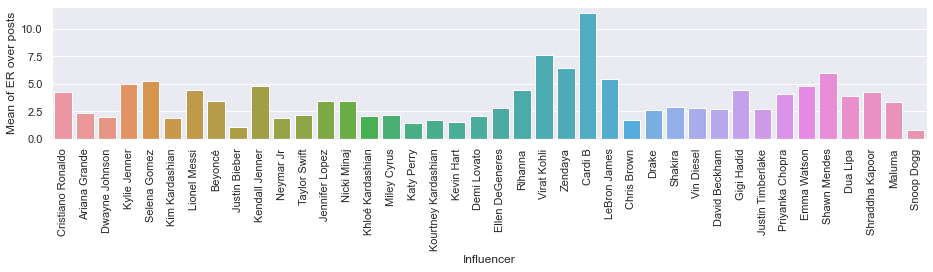

In [24]:
plt.figure(figsize=(13,4))
ax = sns.barplot(x="influencer", y="ER", data=df, ci=None)
plt.ylabel('Mean of ER over posts')
plt.xlabel('Influencer')
for item in ax.get_xticklabels():
    item.set_rotation(90)
plt.tight_layout()

* We notice that been the most followed on Instagram in the world does not mean necessarly having the best ER per post. From, the graph, Cardi B has the best ER per post with an average of 12, followed by Virat Kohli  with an average of 7.5 and the last one with an average ER per post of 0.8 is Snoop Dogg.

Let's see now, the distribution of the different kind of activities among the top 40 world's instagramers:

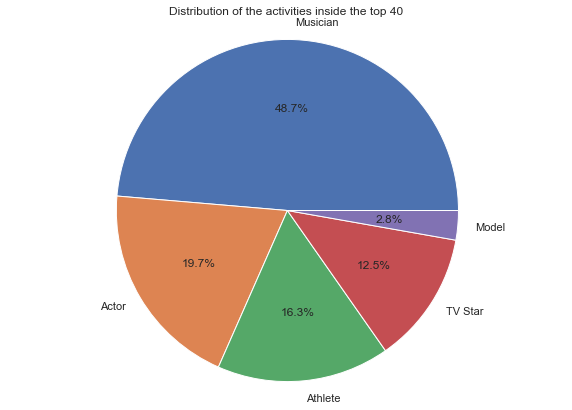

In [29]:
activity = df['pr_activity'].value_counts() / df.shape[0]

plt.figure(figsize=(10,7))
plt.pie(activity,
        labels=activity.index,
        autopct='%1.1f%%')
plt.title("Distribution of the activities inside the top 40")
plt.axis('equal')
plt.show()

* Approximalty 50% of top 40 are musicians, followed by actors (20%) and the least represented are Model (3%).

We check now if the activity influence the ER per post:

In [31]:
df.groupby("pr_activity").mean()

,num_posts,num_followers,num_followings,num_comments,num_likes,year,month,day,hour,num_followers_evolution,num_words,ER
pr_activity,,,,,,,,,,,,
Actor,4418.014346,9.649828e+07,597.993180,6239.110771,2.233197e+06,2019.185089,6.715193,15.661806,13.086548,8.075449e+07,33.179915,3.430119
Athlete,2074.040956,1.342341e+08,500.638225,17846.968146,3.811269e+06,2018.906997,6.990046,15.781286,13.785836,9.745129e+07,20.705631,4.460131
Model,3130.000000,6.252524e+07,1191.000000,5675.750836,1.903589e+06,2018.780936,6.187291,15.254181,13.408027,4.241536e+07,34.618729,4.449296
Musician,5266.523573,1.064976e+08,1002.020519,12420.472418,2.760303e+06,2019.155087,7.303875,15.317618,12.956576,9.164970e+07,18.338423,3.396817
TV Star,4711.568140,1.620348e+08,124.341626,25679.932417,4.103813e+06,2019.336799,7.145191,15.541032,14.750464,1.285583e+08,16.069068,3.124004


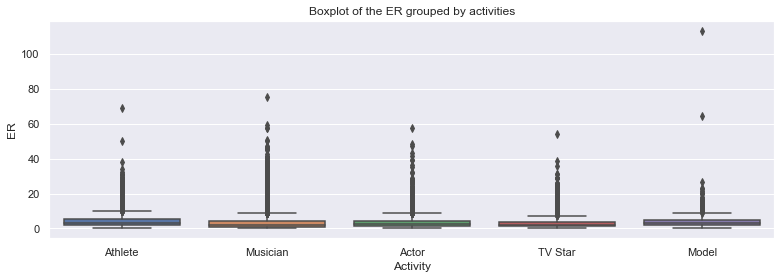

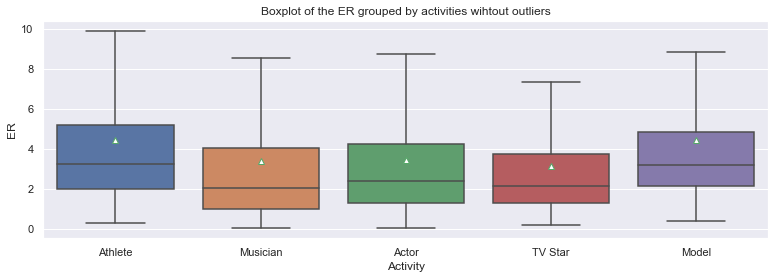

In [42]:
plt.figure(figsize=(13,4))
sns.boxplot(x="pr_activity", y="ER", data=df)
plt.ylabel('ER')
plt.xlabel('Activity')
plt.title("Boxplot of the ER grouped by activities")
plt.show()
plt.figure(figsize=(13,4))
sns.boxplot(x="pr_activity", y="ER", data=df, showmeans=True, meanprops={'markerfacecolor':'white'}, showfliers=False)
plt.ylabel('ER')
plt.xlabel('Activity')
plt.title("Boxplot of the ER grouped by activities wihtout outliers")
plt.show()


* We notice that the maximum ER is achieved by a model's post. However, if we zoom in we observe that the athletes distribution has the best median and mean of ER per post followed by the model activity.

## Impact of the timing ?

Now that we checked the relationship between professional activity and our target variable ER, we wonder if the time (hours and the day of the week) does influence the ER per post.

### Impact of the day of the week?

This part is dedicated to see if the day of posting has an impact on the reactions created by a post.

In [44]:
df.groupby('Day_week').mean()

,num_posts,num_followers,num_followings,num_comments,num_likes,year,month,day,hour,num_followers_evolution,num_words,ER
Day_week,,,,,,,,,,,,
Friday,4680.132037,1.139171e+08,756.980847,13501.300058,3.057577e+06,2019.147417,7.073128,15.112014,12.860128,9.322475e+07,21.935577,3.665274
Monday,4494.123834,1.155379e+08,735.720167,14020.816983,3.021405e+06,2019.139595,7.017047,15.894500,13.474751,9.392812e+07,21.775491,3.557043
Saturday,4502.807487,1.150001e+08,723.697097,13692.794500,2.972702e+06,2019.122995,7.008021,15.074484,13.123759,9.356298e+07,20.238732,3.567861
Sunday,4975.273128,1.149173e+08,782.514317,14067.443833,2.968772e+06,2019.071953,6.966593,15.492658,13.390602,9.249959e+07,19.857930,3.581845
Thursday,4263.770769,1.138063e+08,708.564000,13339.135077,2.912664e+06,2019.133538,7.211692,15.884923,13.740615,9.225383e+07,22.619692,3.531902
Tuesday,4086.690506,1.161459e+08,710.921924,13301.462836,2.916304e+06,2019.139600,7.151780,15.360087,13.582761,9.562836e+07,23.496877,3.543511
Wednesday,4214.728356,1.142627e+08,736.458281,13093.908407,2.950049e+06,2019.163112,7.136136,15.553639,13.307089,9.462538e+07,22.236198,3.550869


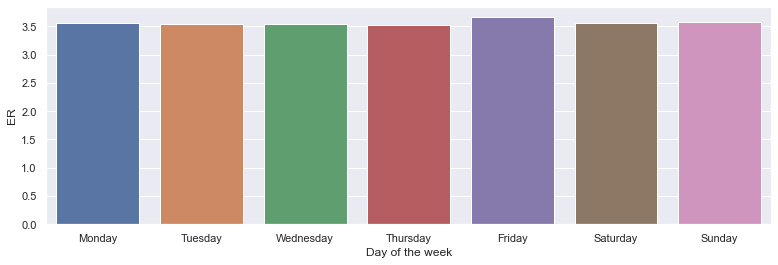

In [46]:
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"]
plt.figure(figsize=(13,4))
sns.barplot(x="Day_week", y="ER", data=df, ci=None, order = days_order)
plt.ylabel('ER')
plt.xlabel('Day of the week')
plt.show()

* We observe that we have practically the same ER average per week day, apart from Friday which is slightly better with an ER average of 3.66.

But, does the day of posting per professional activity impact the ER ? We see this in the following graph:

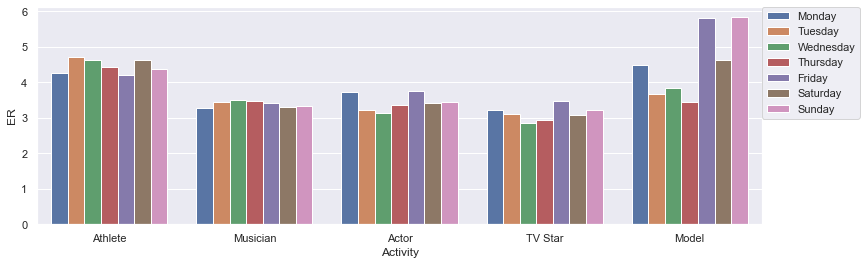

In [54]:
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"]
plt.figure(figsize=(13,4))
sns.barplot(x="pr_activity", y="ER", hue="Day_week", data=df, ci=None, hue_order=days_order)
plt.ylabel('ER')
plt.xlabel('Activity')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

* We get an interesting result in graph, as we notice some activities have some prefered posting days, such as athlete with Tuesday and Saturday (matches days), actors, TV stars and models have better ER on Friday and Sunday (shows days).

### Impact of the hour of posting?

Now that we have an idea about the influence of the day of posting during the week, another parameter can influence the ER score which is the hour of posting. 

In [55]:
hours_day = list(range(0,24))
days_chunk = {}
for i in range(len(hours_day)):
    if(i+1)%4 == 0:
        days_chunk[str(i-3) +"-" + str(i)] = hours_day[i-3:i+1]
days_chunk

{'0-3': [0, 1, 2, 3],
 '4-7': [4, 5, 6, 7],
 '8-11': [8, 9, 10, 11],
 '12-15': [12, 13, 14, 15],
 '16-19': [16, 17, 18, 19],
 '20-23': [20, 21, 22, 23]}

In [62]:
days_keys= list(days_chunk.keys())
days_values= list(days_chunk.values())
df["hour_range"] = df.hour.apply(lambda x: days_keys[np.where(([x in l for l in days_values]))[0][0]])
df.hour_range.value_counts()

16-19    6204
20-23    4904
0-3      3561
12-15    3134
4-7      2323
8-11     1411
Name: hour_range, dtype: int64

In [63]:
df.groupby("hour_range").mean()

,num_posts,num_followers,num_followings,num_comments,num_likes,year,month,day,hour,num_followers_evolution,num_words,ER
hour_range,,,,,,,,,,,,
0-3,4998.088458,1.106172e+08,920.536366,13207.523448,3.041480e+06,2019.062061,7.112890,15.423477,1.347374,9.196421e+07,18.618927,3.909335
12-15,3460.292278,1.136051e+08,621.012125,13022.090938,2.825185e+06,2019.141991,7.122846,15.419272,13.837269,9.061538e+07,24.917039,3.516398
16-19,4371.921986,1.230233e+08,662.295293,15064.438910,3.126063e+06,2019.196970,7.104771,15.723404,17.491135,1.015415e+08,22.872985,3.371507
20-23,4603.629894,1.159012e+08,716.766313,13983.362357,3.000674e+06,2019.164560,7.048328,15.450856,21.442700,9.677122e+07,21.125408,3.428639
4-7,5040.903573,1.049980e+08,840.390874,11258.534223,2.735277e+06,2019.056393,7.141197,15.251399,5.270771,8.328033e+07,19.603960,3.766467
8-11,4087.866052,1.037827e+08,743.260099,11296.611623,2.735684e+06,2019.024805,6.887314,15.278526,9.593905,7.684010e+07,24.502481,3.905208


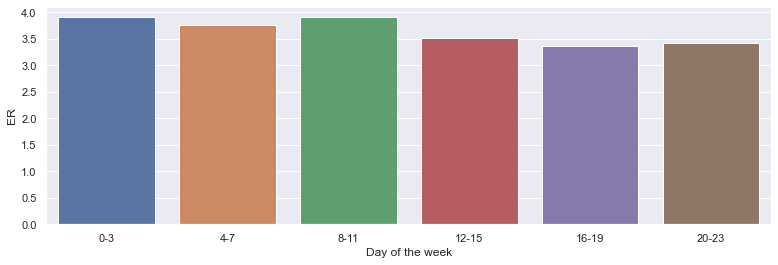

In [60]:
plt.figure(figsize=(13,4))
sns.barplot(x="hour_range", y="ER", data=df, ci=None, order = days_keys)
plt.ylabel('ER')
plt.xlabel('Day of the week')
plt.show()

* We notice that after midnight to mid-day (UTC+1 time zone), the posts get better ER is the best.

Does this depend of the activity ?

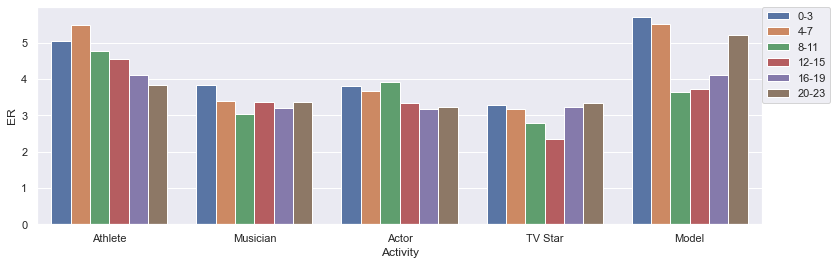

In [64]:
plt.figure(figsize=(13,4))
sns.barplot(x="pr_activity", y="ER", hue="hour_range", data=df, ci=None, hue_order=days_keys)
plt.ylabel('ER')
plt.xlabel('Activity')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

* According to these graphs, the best time to post for athletes is at 4-7, for musician 0-3, for actors 8-11, for TV stars 20-23 and 0-3 and for models is 0-3.

## Influence of media type on ER:

Another feature that can influence the ER score is the media type. In fact, we have two types of media as shown in the pie graph below:

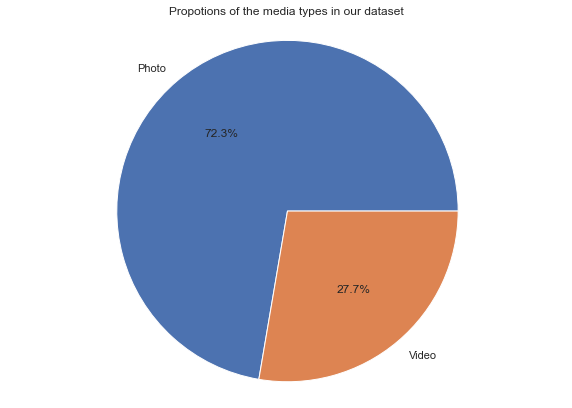

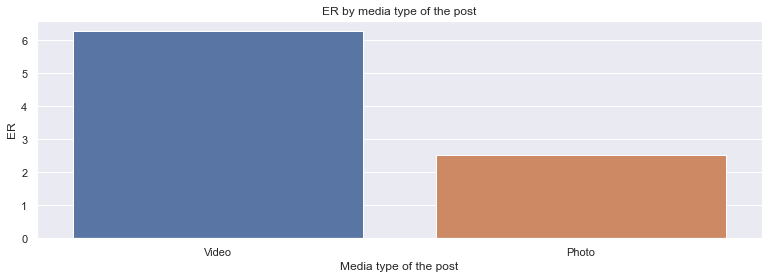

In [68]:
media_counts = df.media_type.value_counts()
plt.figure(figsize=(10,7))
plt.pie(media_counts,
        labels=media_counts.index,
        autopct='%1.1f%%')
plt.title("Propotions of the media types in our dataset")
plt.axis('equal')
plt.show()

plt.figure(figsize=(13,4))
sns.barplot(x="media_type", y="ER", data=df, ci=None)
plt.ylabel('ER')
plt.xlabel('Media type of the post')
plt.title("ER by media type of the post")
plt.show()

* We observe that our 70% of the posts in our dataset contains are photos. However, we notice that videos have better ER by post than photos posts.

Does this impact depends on the activity of the influencer ?

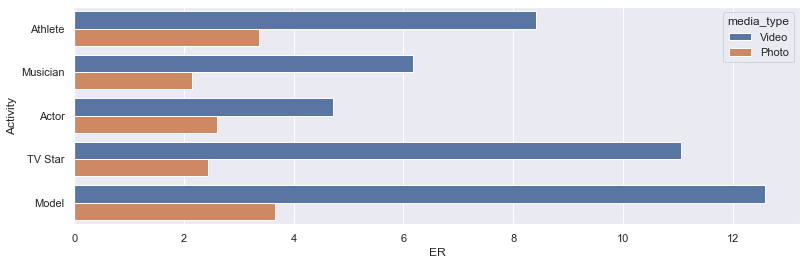

In [5]:
plt.figure(figsize=(13,4))
sns.barplot(x="ER", y="pr_activity", hue="media_type", data=df, ci=None)
plt.ylabel('Activity')
plt.xlabel('ER')
plt.show()

* We notice that videos have higher effect compared to photos on the ER by post for TV stars and Models.

## Impact of frequency on the ER of influencer post:

To check the impact of posting frequency, we get the top influencers and see the evolution of their ER by post in 2020

In [70]:
top_10_influencers = df.sort_values('num_followers_evolution', ascending=False)['influencer'].unique()[:10]
print(top_10_influencers)
df_10_influencers = df[df['influencer'].isin(top_10_influencers)].copy()

['Cristiano Ronaldo' 'Justin Bieber' 'Ariana Grande' 'Dwayne Johnson'
 'Kylie Jenner' 'Selena Gomez' 'Kim Kardashian' 'Lionel Messi' 'Beyoncé'
 'Kendall Jenner']


In [74]:
df_2020 = df_10_influencers[df_10_influencers['year'] == 2020]


,influencer,pr_activity,num_posts,num_followers,num_followings,post_description,num_comments,num_likes,posting_date_complete,media_type,year,month,day,hour,Day_week,posting_date,num_followers_evolution,num_words,ER,hour_range
0,Cristiano Ronaldo,Athlete,2982,253140888,459,Another week of playing inside and staying act...,22995,15023301,2020-04-11 09:02:26+00:00,Video,2020,4,11,9,Saturday,2020-04-11,214450833,27,7.016198,8-11
1,Cristiano Ronaldo,Athlete,2982,253140888,459,We wish a Happy Easter to everyone 🌍❤️🙏\r\n#st...,62374,9661590,2020-04-12 13:18:16+00:00,Photo,2020,4,12,13,Sunday,2020-04-12,214581645,8,4.531592,12-15
2,Cristiano Ronaldo,Athlete,2982,253140888,459,".\r\n\r\nKids, let the Dad do his work 🤷🏻‍♂️❤️...",108402,43462083,2020-04-13 12:57:43+00:00,Video,2020,4,13,12,Monday,2020-04-13,214712537,9,20.292474,12-15
3,Cristiano Ronaldo,Athlete,2982,253140888,459,Feeling very thankful to have my mum home from...,62612,9435202,2020-03-28 23:17:59+00:00,Photo,2020,3,28,23,Saturday,2020-03-28,212627815,20,4.466873,20-23
4,Cristiano Ronaldo,Athlete,2982,253140888,459,"In this difficult moment for the whole world, ...",67666,9668361,2020-03-30 12:58:03+00:00,Photo,2020,3,30,12,Monday,2020-03-30,212887294,41,4.573325,12-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,Cristiano Ronaldo,Athlete,2982,253140888,459,"They call me the “traveler”, a soldier from an...",18932,7398977,2020-12-29 18:01:24+00:00,Video,2020,12,29,18,Tuesday,2020-12-29,249632794,40,2.971528,16-19
602,Cristiano Ronaldo,Athlete,2982,253140888,459,A short break that I’ll allways remember for t...,24582,5882673,2020-12-30 16:18:50+00:00,Photo,2020,12,30,16,Wednesday,2020-12-30,249981404,75,2.363078,16-19
603,Cristiano Ronaldo,Athlete,2982,253140888,459,I’m really happy with my CR7 Fragrances collec...,25539,4245966,2020-12-30 20:00:07+00:00,Photo,2020,12,30,20,Wednesday,2020-12-30,249981404,32,1.708729,20-23
604,Cristiano Ronaldo,Athlete,2982,253140888,459,"Muitos parabéns mãe, desejo-lhe toda a felicid...",35228,7037655,2020-12-31 13:22:24+00:00,Photo,2020,12,31,13,Thursday,2020-12-31,250330501,13,2.825418,12-15


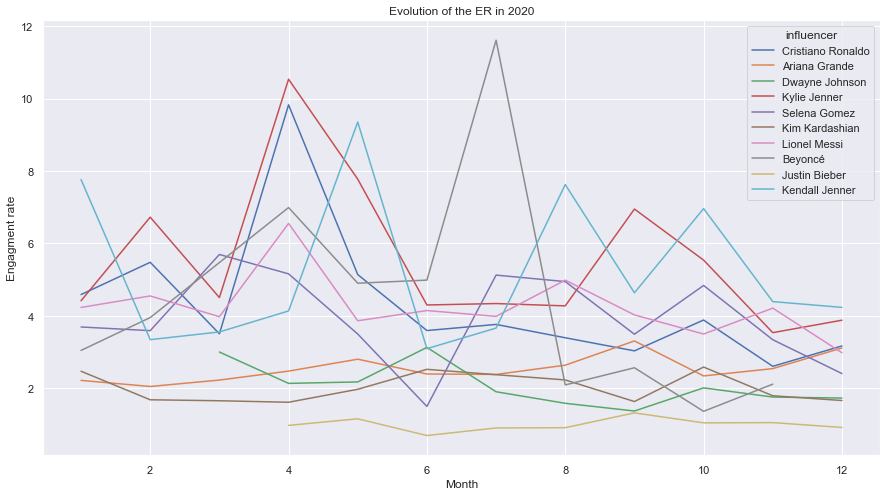

In [78]:
plt.figure(figsize=(15,8))
sns.lineplot(x = "month" ,y='ER', hue = 'influencer', data=df_2020, ci = None)
plt.title('Evolution of the ER in 2020')
plt.ylabel('Engagment rate')
plt.xlabel('Month')
plt.show()

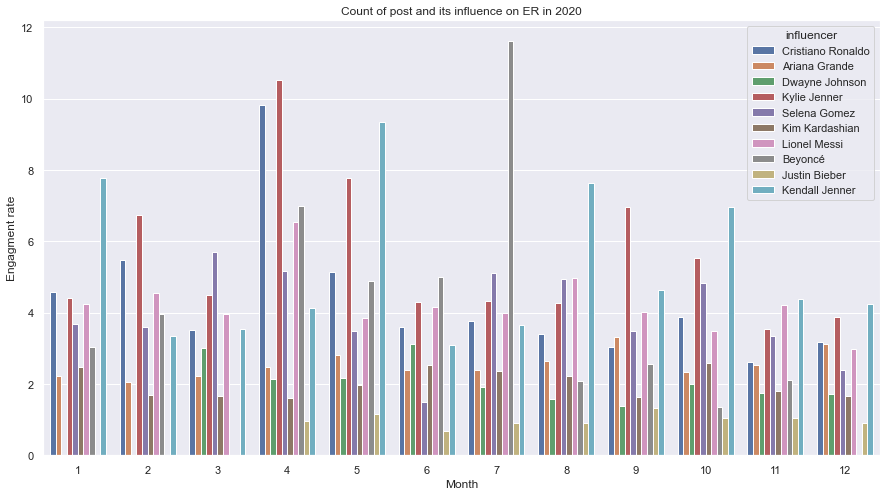

In [79]:
plt.figure(figsize=(15,8))
sns.barplot(x='month', y='ER', hue = 'influencer', data=df_10_influencers[df_10_influencers['year'] == 2020], ci=None)
plt.title('Count of post and its influence on ER in 2020')
plt.ylabel('Engagment rate')
plt.xlabel('Month')
plt.show()

* We notice that the picks in the graph of the **ER** evolution in 2020 are related the frequency of posting per month. As example, we have picks for Cristiano and Kylie in Avril (the start of lockdowns), Kendall in May and Beyonce in July, which all correspond to higher frequency during that month.

## Analysis of the target

Firstly, let's have a look to the distribution of the target, the engagement rate.

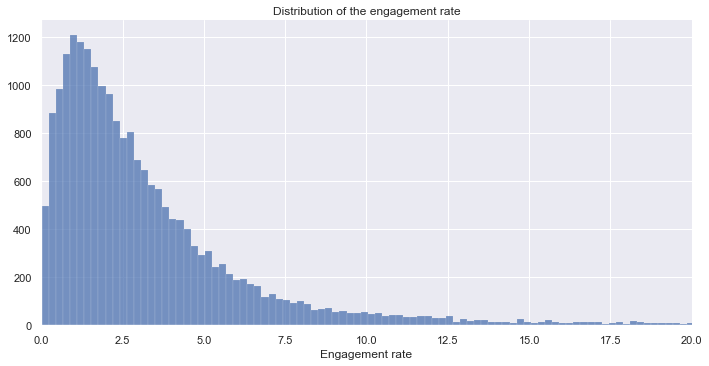

In [27]:
sns.displot(df['ER'], height= 5, aspect=10/5)
plt.title('Distribution of the engagement rate')
plt.xlim(0,20)
plt.xlabel('Engagement rate')
plt.ylabel('')
plt.show()

C:\Users\L.Badr\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


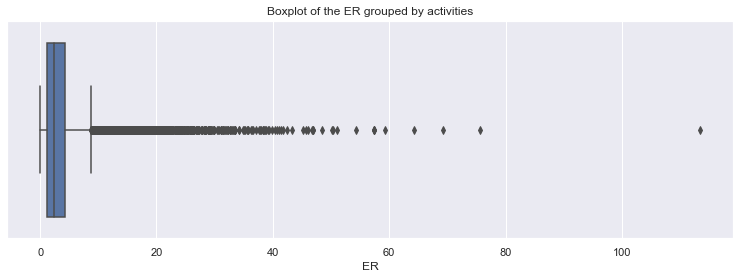

In [69]:
plt.figure(figsize=(13,4))
sns.boxplot("ER", data=df)
plt.title("Boxplot of the ER by post")
plt.show()

# Post Description Analysis

Moving past the general data exploration, we can dive in a little further by looking at the content of all the posts. To do so, we use Natural Language Processing to generate some features that we think would be useful to evaluate the post description performance and its impact on the engagement rate. 
* Since the influencers are from different countries so language is not the same in all descriptions. However, the most frequent language is Egnlish. We may translate the non english descriptions using googletrans API, but it takes too much time in the local machine.  
* Before using NLP we clean the text by getting rid of number, emoticons, punctuation and stop words and focusing only on words that will be tokenized.
* Then, the words are reduced to its root using Stemming.

The nlp preprocessing function with the differents steps is defined in  pre-processing library

In [36]:
import pre_processing
df["clean_post_description"] = df["post_description"].apply(pre_processing.pre_process)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Number of hashtags and References

In [37]:
df["num_hashtags"] = df["post_description"].apply(pre_processing.hashtags_num)
df["num_ref"] = df["post_description"].apply(pre_processing.ref_num)

Text(0.5, 1.0, 'Engagement rate vs num_ref')

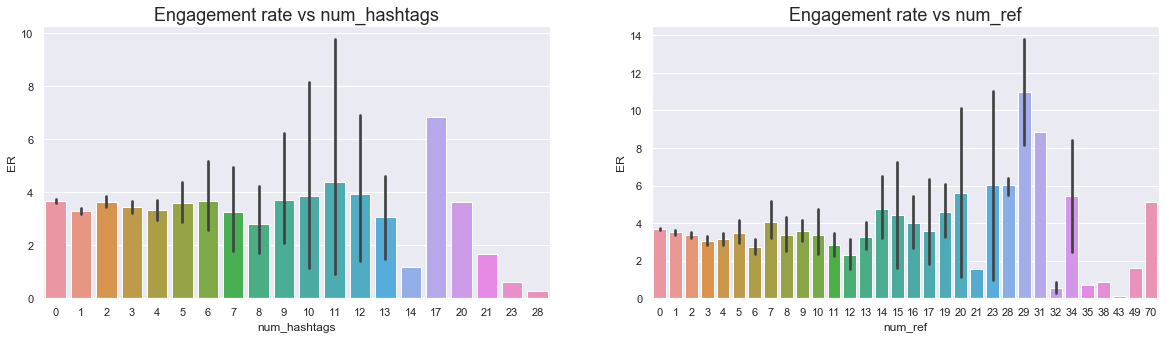

In [38]:
f, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.barplot(x="num_hashtags", y="ER", data=df,ax=axes[0]).set_title("Engagement rate vs num_hashtags",
                                                                      fontsize=18)
sns.barplot(x="num_ref", y="ER", data=df,ax=axes[1]).set_title("Engagement rate vs num_ref",
                                                                      fontsize=18)

Using too much hashtags and references is not always the right choice to attract people. As the first figure above shows for 28 hashtags, the engagement rate is less than 0.29. In contrast, 17 hashtags is almost the best one.

## Positive or Negative Caption?

The variable **Polarity** which describes the the attitude, the emotion or the reaction of the influencer in the post, is generated by using the [TextBlob API](https://textblob.readthedocs.io/en/dev/api_reference.html#textblob.blob.TextBlob.sentiment) that has pre-defined semantic labels that gives an idea about a sentence either "Negative: -1", "Posive: 1" or "Neutral: 0".

In [39]:
df['polarity'] = df['clean_post_description'].apply(pre_processing.polarity)
df['sentiment'] = df['polarity'].apply(pre_processing.sentiment)

### Post Descriptions World Cloud

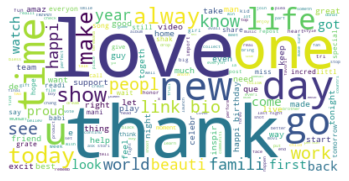

In [40]:
from wordcloud import WordCloud
# Start with one review:
text = " ".join(description for description in df.clean_post_description)

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**love** is the most frequent word used all time. If we look for the most hashtag in instagram used by influencers we will find #love.

+----+------------+-----------+------------+
|    |   negative |   neutral |   positive |
|----+------------+-----------+------------|
| ER |    3.77793 |   3.57962 |    3.52944 |
+----+------------+-----------+------------+


Text(0.5, 1.0, 'Sentiment Histogram')

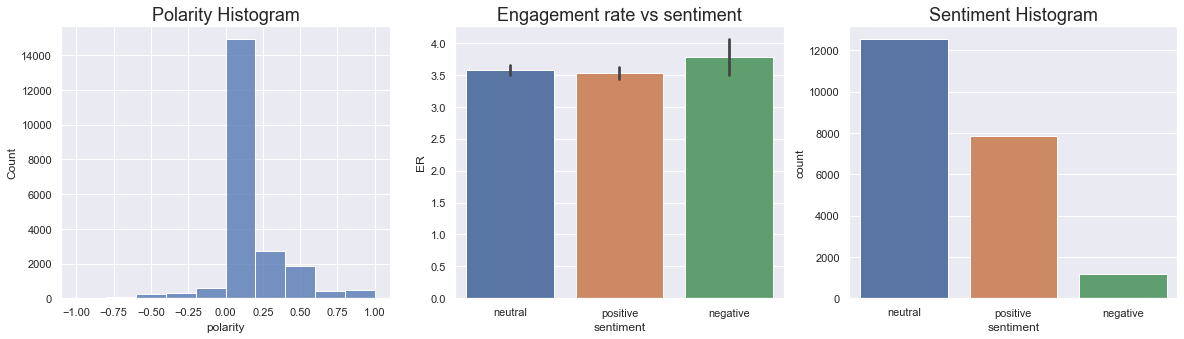

In [42]:
print(tabulate(df[['ER','sentiment']].groupby('sentiment').mean().T, headers='keys', tablefmt='psql'))
f, axes = plt.subplots(1, 3, figsize=(20, 5))
sns.histplot(df.polarity,bins=10,ax=axes[0]).set_title("Polarity Histogram",
                                                           fontsize=18)
sns.barplot(x="sentiment", y="ER", data=df,ax=axes[1]).set_title("Engagement rate vs sentiment",
                                                                      fontsize=18)
sns.countplot(x="sentiment", data=df,ax=axes[2]).set_title("Sentiment Histogram",
                                                                      fontsize=18)

We note that number of negative captions is very low among all post description. However, the mean value of engagement rate calculated for each sentiment shows that people are more engaged in negative post then positive. Because, bad news gets more attention, more clicks, and leads to more likes and comments for the publication.

## Topic modeling 

**Topic modeling** is a type of statistical modeling for finding out the abstract “topics” that in a collection of documents. Latent Dirichlet Allocation (LDA) is an example of topic model and is used to classify text in a document to a particular topic. We use the constructor [gensim.models.LdaMulticore](https://tedboy.github.io/nlps/generated/generated/gensim.models.LdaMulticore.html) that estimates Latent Dirichlet Allocation model parameters based on a training corpus. Therefore, the dominant topic will be assigned to each post description.

In [43]:
# To import the pretrained model use re_train =False and to train the model in a new corpus use re_train = True
df_topic_sents_keywords = pre_processing.LDAmodel(df.clean_post_description,passes=2,
                                   num_topics=5,
                                   workers = 2,
                                  re_train=False)

df = pd.concat([df, df_topic_sents_keywords], axis=1)

# Decomment the following code to visualise each topic
"""
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")"""

'\nfor idx, topic in lda_model.print_topics(-1):\n    print("Topic: {} \nWords: {}".format(idx, topic ))\n    print("\n")'

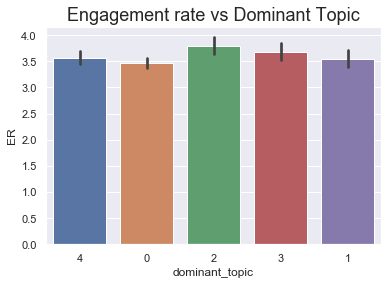

In [44]:
sns.barplot(x="dominant_topic", y="ER", data=df).set_title("Engagement rate vs Dominant Topic",
                                                                           fontsize=18)
plt.show()

## Correlation between variables

In [52]:
from sklearn import preprocessing

df = pd.read_csv('data/preprocess_data.csv')

df['sentiment'] = df['sentiment'].replace({'neutral':0,'positive':1,'negative':-1})
df['media_type'] = df['media_type'].replace({'Photo':0,'Video':1})

df['Day_week'] = preprocessing.LabelEncoder().fit_transform(df['Day_week'])

df = df[['num_posts', 'media_type', 'Day_week', 'num_words',
       'num_hashtags', 'num_ref', 'polarity',
       'sentiment', 'dominant_topic', 'perc_contribution','ER']]

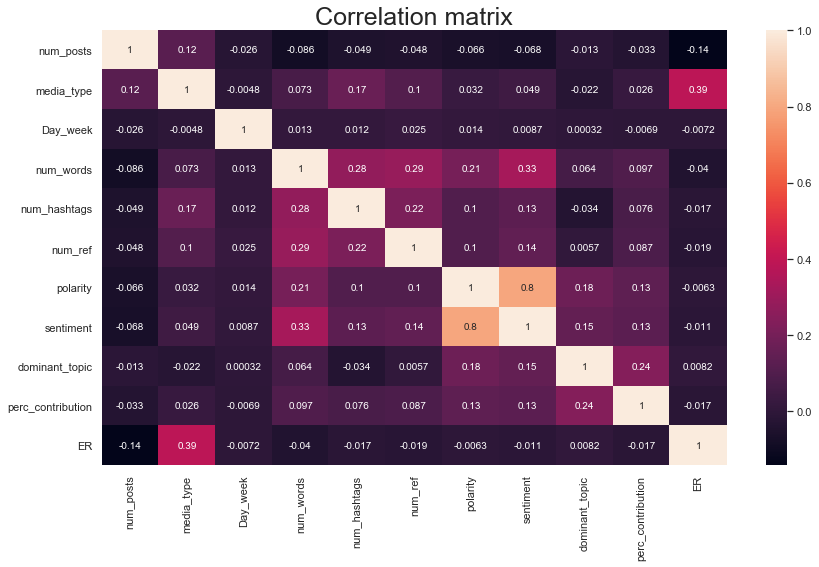

In [54]:
plt.figure(figsize=(14,8))
sns.heatmap(df.astype(float).corr(),annot=True, annot_kws={"size": 10})
plt.title("Correlation matrix", fontsize =25)
plt.show()

# 5. Workflow

The work flow is composed of two essential elements that make up the submission: the feature extractor and the regressor. The first allows both the preparation of initial data and the creation of new variables. The second, on the other hand, allows a supervised learning model to be trained so that the engagement rate on Instagram's post can be correctly predicted. This model is trained on a part of the base obtained from the feature extractor output, then is evaluated on the remaining part.

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import nlp_pre_processing

df = pd.read_csv(r"data/2_clean_data/data_inst.csv")

df = df.drop(columns=['posting_date.1'])

df["clean_post_description"] = df["post_description"].apply(nlp_pre_processing.pre_process)
df['polarity'] = df['clean_post_description'].apply(nlp_pre_processing.polarity)
df['sentiment'] = df['polarity'].apply(nlp_pre_processing.sentiment)
df["clean_post_description"] = df["post_description"].apply(nlp_pre_processing.pre_process)
df["num_hashtags"] = df["post_description"].apply(nlp_pre_processing.hashtags_num)
df["num_ref"] = df["post_description"].apply(nlp_pre_processing.ref_num)
df_topic_sents_keywords = nlp_pre_processing.LDAmodel(df.clean_post_description,passes=2,
                                   num_topics=5,
                                   workers = 2,
                                  re_train=False)


df = pd.concat([df, df_topic_sents_keywords], axis=1)

df = df.drop(columns = ['num_comments','num_likes','post_description',
                       'clean_post_description','posting_date',
                       'num_followers_t'])

df['sentiment'] = df['sentiment'].replace({'neutral':0,'positive':1,'negative':-1})
df['media_type'] = df['media_type'].replace({'Photo':0,'Video':1})

df['Day_week'] = LabelEncoder().fit_transform(df['Day_week'])

df = pd.concat([df, pd.get_dummies(df['pr_activity'])],axis=1)
df = df.drop(columns = ['pr_activity','Model','influencer'])

df.head(3)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/simondemouchy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/simondemouchy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,num_posts,num_followings,media_type,year,month,day,hour,Day_week,num_words,ER,polarity,sentiment,num_hashtags,num_ref,dominant_topic,perc_contribution,Actor,Athlete,Musician,TV Star
0,2982,459,1,2020,4,11,9,2,27,7.016198,0.0,0,2,1,4,0.5348,0,1,0,0
1,2982,459,0,2020,4,12,13,3,8,4.531592,0.0,0,1,0,4,0.6259,0,1,0,0
2,2982,459,1,2020,4,13,12,1,9,20.292474,0.0,0,2,0,4,0.3556,0,1,0,0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['ER']), df['ER'])

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

regressor = RandomForestRegressor()

model = regressor.fit(X_train, y_train)

y_predict = model.predict(X_test)

ValueError: could not convert string to float: 'Beyoncé'

In [62]:
from sklearn.metrics import mean_squared_error
print('R**2 :', model.score(X_test, y_test))
print('RMSE :', np.sqrt(mean_squared_error(y_predict, y_test)))

R**2 : 0.5264973847989133
RMSE : 3.1319993535250616


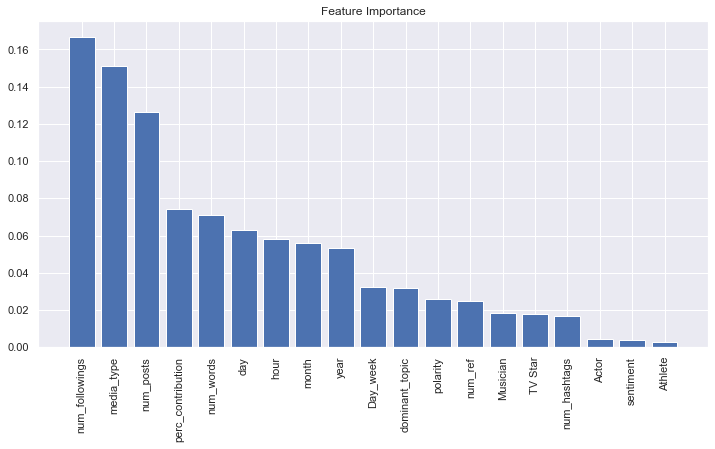

In [63]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

names = [df.drop(columns=['ER']).columns[i] for i in indices]

plt.figure(figsize=(12,6))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation = 90)
plt.show()

# 6. Submission

To make a RAMP submission you will need to create a new directory within submissions, naming it as you wish, and a file named estimator.py within the new directory, e.g. submissions/my_new_sub/estimator.py

Within estimator.py, define a function named get_estimator that returns a scikit-learn pipeline or estimator that performs the desired feature extraction and regression.

For example, the estimator.py file below will perform the workflow detailed above

In [35]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor


def processing_data(X):
    
    X['sentiment'] = X['sentiment'].replace({'neutral':0,'positive':1,'negative':-1})
    X['media_type'] = X['media_type'].replace({'Photo':0,'Video':1})
    
    X["clean_post_description"] = df["post_description"].apply(nlp_pre_processing.pre_process)
    X['polarity'] = df['clean_post_description'].apply(nlp_pre_processing.polarity)
    X['sentiment'] = df['polarity'].apply(nlp_pre_processing.sentiment)
    X["clean_post_description"] = df["post_description"].apply(nlp_pre_processing.pre_process)
    X["num_hashtags"] = df["post_description"].apply(nlp_pre_processing.hashtags_num)
    X["num_ref"] = df["post_description"].apply(nlp_pre_processing.ref_num)
    X_topic_sents_keywords = nlp_pre_processing.LDAmodel(df.clean_post_description,passes=2,
                                   num_topics=5,
                                   workers = 2,
                                  re_train=False)
    X = pd.concat([X, X_topic_sents_keywords], axis=1)
 
    return np.c_[X['sentiment'].values,X['media_type'].values,
                X['clean_post_description'].values,X['polarity'].values,
                X['num_hashtags'].values,X['num_ref'].values,
                X['dominant_topic'].values,X['perc_contribution'].values]
                  

transformer_var = FunctionTransformer(
    lambda df: processing_data(df)
)
                 
cols = ['num_posts', 'num_followings','year', 'month', 'day', 'hour',
        'num_words','polarity','dominant_topic', 'perc_contribution']
                 

transformer = make_column_transformer(
    (transformer_var, ['sentiment', 'media_type']),
    (LabelEncoder(), ['Day_week']),
    (OneHotEncoder(), ['pr_activity']),
    ('passthrough', cols),
)

pipe = make_pipeline(
    transformer,
    StandardScaler(),
    RandomForestRegressor()
)
    
def get_estimator():
    return pipe